# The Lorenz Differential Equations

Before we start, we import some preliminary libraries. We will also import (below) the accompanying `lorenz.py` file, which contains the actual solver and plotting routine.

In [163]:
%matplotlib inline
from ipywidgets import interactive, fixed

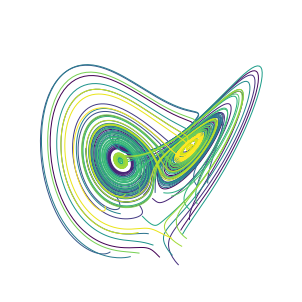

(array([0.        , 0.004004  , 0.00800801, 0.01201201, 0.01601602,
        0.02002002, 0.02402402, 0.02802803, 0.03203203, 0.03603604,
        0.04004004, 0.04404404, 0.04804805, 0.05205205, 0.05605606,
        0.06006006, 0.06406406, 0.06806807, 0.07207207, 0.07607608,
        0.08008008, 0.08408408, 0.08808809, 0.09209209, 0.0960961 ,
        0.1001001 , 0.1041041 , 0.10810811, 0.11211211, 0.11611612,
        0.12012012, 0.12412412, 0.12812813, 0.13213213, 0.13613614,
        0.14014014, 0.14414414, 0.14814815, 0.15215215, 0.15615616,
        0.16016016, 0.16416416, 0.16816817, 0.17217217, 0.17617618,
        0.18018018, 0.18418418, 0.18818819, 0.19219219, 0.1961962 ,
        0.2002002 , 0.2042042 , 0.20820821, 0.21221221, 0.21621622,
        0.22022022, 0.22422422, 0.22822823, 0.23223223, 0.23623624,
        0.24024024, 0.24424424, 0.24824825, 0.25225225, 0.25625626,
        0.26026026, 0.26426426, 0.26826827, 0.27227227, 0.27627628,
        0.28028028, 0.28428428, 0.28828829, 0.29

In [164]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy import integrate

def solve_lorenz(sigma=10.0, beta=8./3, rho=28.0):
    """Plot a solution to the Lorenz differential equations."""

    max_time = 4.0
    N = 30

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.viridis(np.linspace(0, 1, N))
    
    
    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i],patch_artist=True)
        plt.setp(lines, linewidth=1, )
        

    angle = 104
    ax.view_init(30, angle)
    plt.show()

    return t, x_t

solve_lorenz()

We explore the Lorenz system of differential equations:

$$
\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}
$$

Let's change (\\(\sigma\\), \\(\beta\\), \\(\rho\\)) with ipywidgets and examine the trajectories.

For the default set of parameters, we see the trajectories swirling around two points, called attractors. 

The object returned by `interactive` is a `Widget` object and it has attributes that contain the current result and arguments:

In [165]:
t, x_t = w.result

In [166]:
w.kwargs

{'sigma': 10.0, 'beta': 2.6666666666666665, 'rho': 28.0}

After interacting with the system, we can take the result and perform further computations. In this case, we compute the average positions in \\(x\\), \\(y\\) and \\(z\\).

In [167]:
xyz_avg = x_t.mean(axis=1)

In [168]:
xyz_avg.shape

(30, 3)

Creating histograms of the average positions (across different trajectories) show that, on average, the trajectories swirl about the attractors.

In [169]:
from matplotlib import pyplot as plt

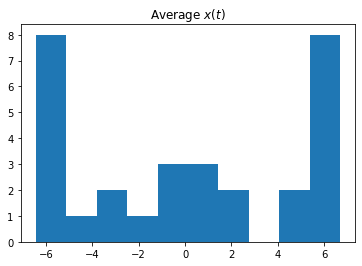

In [170]:
plt.hist(xyz_avg[:,0])
plt.title('Average $x(t)$');

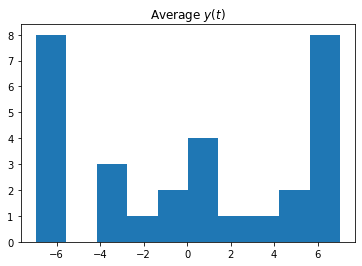

In [171]:
plt.hist(xyz_avg[:,1])
plt.title('Average $y(t)$');